Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 5.0

In [1]:
# Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [2]:
# Números aleatorios en el plano y = 2x_1 + 3x_2

def func(x1,x2):
    return 2.1*x1 - 3.1*x2

In [3]:
# Número de datos 
m = 20
# Número de características
n = 2

x = np.random.uniform(-1,1,(m,2))
Y = func(x[:,0], x[:,1])

In [4]:
# Matriz de características
X = np.ones((n+1,m))
X[1:, :] = np.transpose(x)
X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.20321185, -0.89492948, -0.4377685 ,  0.82278819,  0.78334928,
         0.86059227, -0.45637391, -0.39229106, -0.75120064, -0.11525281,
         0.50065523, -0.8269781 ,  0.56981594,  0.49522231,  0.42406687,
         0.86388625, -0.69921775, -0.56810199, -0.94273886,  0.9114834 ],
       [ 0.09767397,  0.13036241,  0.03044688, -0.79879101,  0.53706285,
        -0.83409874,  0.20316353, -0.37592413, -0.72519863, -0.33419541,
         0.69826695, -0.61677878,  0.91199243,  0.82311029, -0.44469725,
        -0.93681288, -0.26632051,  0.07017434, -0.17552421, -0.85040434]])

In [5]:
xx = np.matrix(np.transpose(X))
yy = np.matrix(Y)

# Ecuación normal

 $$\Theta = (X^T X)^{-1} X^T y$$


In [6]:
((xx.T@xx).I)@xx.T@yy.T

matrix([[ 5.55111512e-17],
        [ 2.10000000e+00],
        [-3.10000000e+00]])

Se obtienen los mismos parámetros que con el método anterior

In [7]:
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando 
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

In [8]:
df

,mean_,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147
...,...,...
501,22.4,6.593
502,20.6,6.120
503,23.9,6.976
504,22.0,6.794


<AxesSubplot:xlabel='mean_', ylabel='rm'>

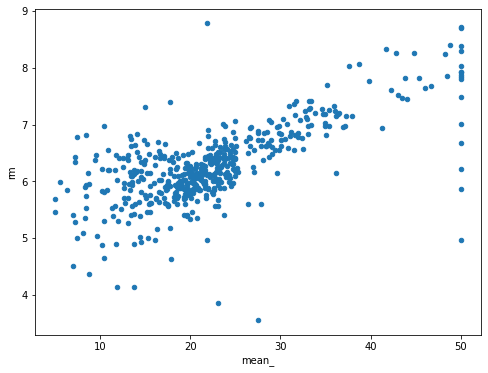

In [9]:
df.plot.scatter(x="mean_", y="rm", figsize=(8,6))

In [14]:
# Matriz de características
X = np.ones((df.shape[1], df.shape[0]))
X[1:, :] = np.transpose(df.mean_)
X

array([[ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
       [24. , 21.6, 34.7, ..., 23.9, 22. , 11.9]])

In [15]:
# Valores de entrenamiento 
Y = np.array(df["rm"])

In [16]:
xx = np.matrix(np.transpose(X))
yy = np.matrix(Y)

In [17]:
theta = ((xx.T@xx).I)@xx.T@yy.T
theta

matrix([[5.08763867],
        [0.05312235]])

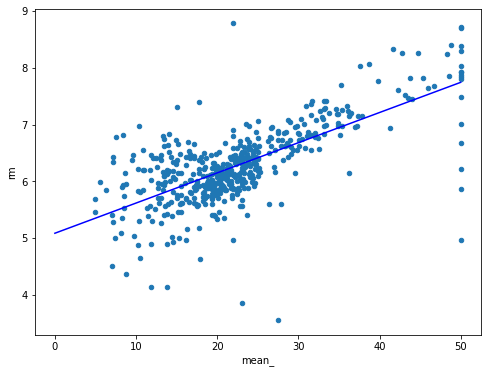

In [23]:
theta = np.array(theta).flatten()
x = np.linspace(0, 50, 100)
df.plot.scatter(x="mean_", y="rm", figsize=(8,6))
plt.plot(x,theta[0]+theta[1]*x, "b-")